In [158]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# Titanic
W tym notatniku ćwiczę podstawy data science, oraz biblotek takich jak: pandas, seaborn.

In [159]:
train.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
560,561,0,3,"Morrow, Mr. Thomas Rowan",male,NaN,0,0,372622,7.7500,NaN,Q
533,534,1,3,"Peter, Mrs. Catherine (Catherine Rizk)",female,NaN,0,2,2668,22.3583,NaN,C
227,228,0,3,"Lovell, Mr. John Hall (""Henry"")",male,20.5,0,0,A/5 21173,7.2500,NaN,S
483,484,1,3,"Turkula, Mrs. (Hedwig)",female,63.0,0,0,4134,9.5875,NaN,S
580,581,1,2,"Christy, Miss. Julie Rachel",female,25.0,1,1,237789,30.0000,NaN,S
813,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.2750,NaN,S
712,713,1,1,"Taylor, Mr. Elmer Zebley",male,48.0,1,0,19996,52.0000,C126,S
47,48,1,3,"O'Driscoll, Miss. Bridget",female,NaN,0,0,14311,7.7500,NaN,Q
92,93,0,1,"Chaffee, Mr. Herbert Fuller",male,46.0,1,0,W.E.P. 5734,61.1750,E31,S
217,218,0,2,"Jacobsohn, Mr. Sidney Samuel",male,42.0,1,0,243847,27.0000,NaN,S


In [160]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [161]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


Spróbujmy podzielić dane na ich typy:
- Nominalne (kategoryczne bez uporządkowania)
    - Cabin
    - Embarked
    - Sex
- Porządkowe
    - Pclass
    - Sibsp
    - Parch
- Liczbowe
    - Age
    - Fare
    
Sprawdźmy teraz ile jest brakujących danych

In [162]:
train.isnull().sum()*100/len(train), test.isnull().sum()*100/len(test)

(PassengerId     0.000000
 Survived        0.000000
 Pclass          0.000000
 Name            0.000000
 Sex             0.000000
 Age            19.865320
 SibSp           0.000000
 Parch           0.000000
 Ticket          0.000000
 Fare            0.000000
 Cabin          77.104377
 Embarked        0.224467
 dtype: float64,
 PassengerId     0.000000
 Pclass          0.000000
 Name            0.000000
 Sex             0.000000
 Age            20.574163
 SibSp           0.000000
 Parch           0.000000
 Ticket          0.000000
 Fare            0.239234
 Cabin          78.229665
 Embarked        0.000000
 dtype: float64)

W danych testowych i trenujących najwięcej brakuje w kolumnie "Cabin". Przyjrzyjmy się temu dokładniej, ***czasami brak informacji jest informacją***.

In [163]:
len(train[['Cabin']].value_counts())

147

Wstępnym pomysłem może być skategoryzowanie pasażerów na zasadzie - ma kabinę, nie ma kabiny.

In [164]:
train[['BoolCabin']] =  train[['Cabin']].isnull()
test[['BoolCabin']] =  test[['Cabin']].isnull()

Przyjrzyjmy się teraz kolumnie 'Age'

In [165]:
mask = train['Age'].isnull()
train[mask]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,BoolCabin
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,True
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,True
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,True
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,True
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C,True
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S,True
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S,True
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S,True


Póki co nie mam pomysłu, liczyłem, że mogą to być dzieci ew. osoby bez kabiny

# Wizualizacja

In [166]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

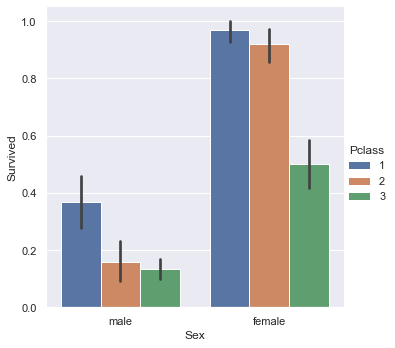

In [167]:
sns.catplot(x="Sex", y="Survived", hue="Pclass", kind="bar", data=train)

Z tej grafiki możemy podejrzewać zależność przeżycia od płci oraz Pclass

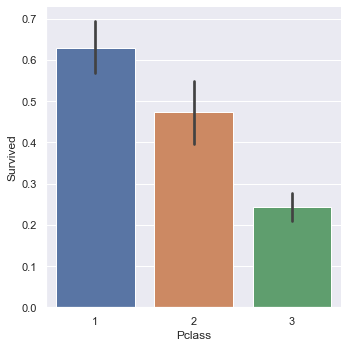

In [168]:
sns.catplot(x="Pclass", y="Survived", kind="bar", data=train)

<AxesSubplot:xlabel='count', ylabel='Pclass'>

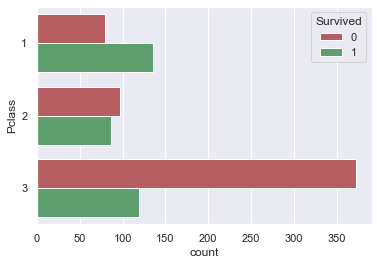

In [169]:
sns.countplot(y="Pclass", data=train,hue='Survived',  palette=["r", "g"])

Jak widzimy powyżej, największy odsetek osób, które przeżyły znajdują się w klasie trzeciej. Sprawdźmy czy fakt posiadania kabiny wpływał na przeżywalność.

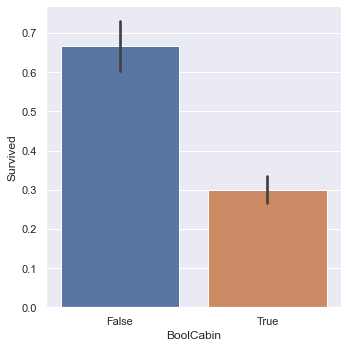

In [170]:
sns.catplot(x="BoolCabin", y="Survived", kind="bar", data=train)

Jak widać osoby, które posiadały kabinę miały o wiele większą szansę przetwania.

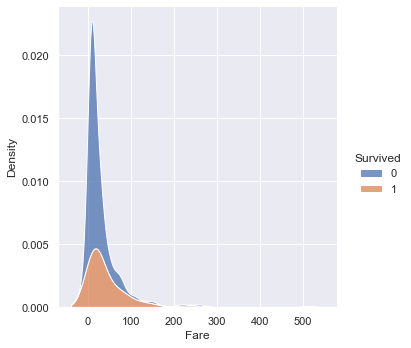

In [171]:
sns.displot(train, x="Fare",hue="Survived", kind="kde", multiple="stack")

Sprawdźmy czym jest ten pik.

<AxesSubplot:xlabel='Fare'>

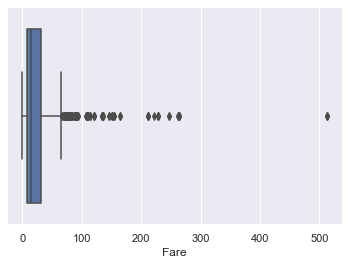

In [172]:
sns.boxplot(x=train["Fare"])

In [173]:
train[["Fare"]].describe()

,Fare
count,891.000000
mean,32.204208
std,49.693429
min,0.000000
25%,7.910400
50%,14.454200
75%,31.000000
max,512.329200


In [174]:
len(train[((train['Fare'] - train['Fare'].mean()) / train['Fare'].std()).abs() > 3])

20

W kolumnie "Fare" jest 20 danych odstających, czyli takich, które leżą od średniej dalej niż 3 standardowe odchylenia. 
Wstępnie spróbujmy usunąć te dane, nie jest ich dużo więc nie utracimy znaczącej części informacji.

<AxesSubplot:xlabel='Fare'>

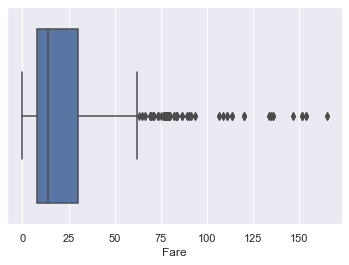

In [175]:
train = train[((train['Fare'] - train['Fare'].mean()) / train['Fare'].std()).abs() <= 3]
sns.boxplot(x=train["Fare"])

Sprawdźmy teraz zależność płci, wieku a śmiertelności

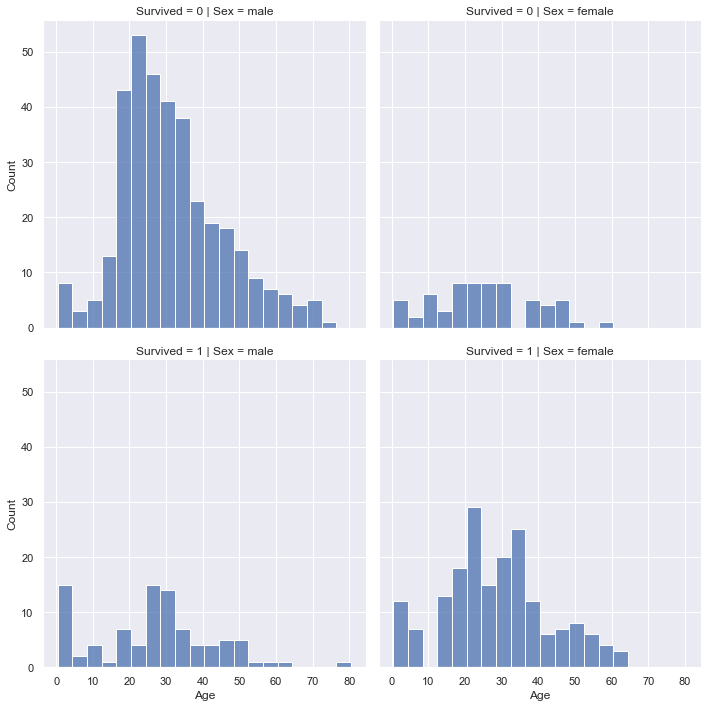

In [176]:
sns.displot(train, x="Age",row="Survived", col="Sex", binwidth=4)

# Przygotowywanie danych

In [177]:
train['Sex'] = train.Sex.astype('category')
test['Sex'] = test.Sex.astype('category')

train["Sex"]=train["Sex"].cat.codes
test["Sex"]=test["Sex"].cat.codes

In [178]:
train['Embarked'] = train.Embarked.astype('category')
test['Embarked'] = test.Embarked.astype('category')

train["Embarked"]=train["Embarked"].cat.codes
test["Embarked"]=test["Embarked"].cat.codes

In [179]:
del train['Cabin']
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,BoolCabin
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0,False
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,False
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2,True
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,2,True
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,2,False
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,2,True
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,0,False


## Co z wiekiem?
Spróbujmy teraz poradzić sobie z brakującymi danymi w kolumnie "Age". Pierwszy pomysł to uzupełnienie danych za pomocą interpolacji średniej, jednak tego typu informacja jest według mnie za cenna by coś takiego zrobić. Spróbujmy wykorzystać algorytm RandomForestRegressor do tego.

In [180]:
from sklearn.ensemble import RandomForestRegressor
trainTREE = train.loc[(train.Age.notnull())]  # known age values
testTREE = train.loc[(train.Age.isnull())]  # all nan age values

y = trainTREE.values[:, 5] #wiek
X = trainTREE.values[:, [2, 4]] #pclass and sex

rfr = RandomForestRegressor(n_estimators=2000, n_jobs=-1)
rfr.fit(X, y)

predictedAges = rfr.predict(testTREE.values[:, [1, 2]])

train['pred_age'] = train.Age

train.loc[(train.pred_age.isnull()), 'pred_age'] = predictedAges


In [185]:
train.isnull().sum()*100/len(train)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.091848
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Embarked        0.000000
BoolCabin       0.000000
pred_age        0.000000
dtype: float64

***Dobrze!*** Nie mamy pustych wartości w tym momencie!

# Korelacja